# Poissson Process
$$
P\{ N(t-t_{0}) = n \} = \frac{(\lambda t)^{n}}{n!}e^{-\lambda t}
$$


- The interval time between two event happening is obey to the exponent distribution

$$
f_{X_{i}}(x) = \begin{cases}\lambda e^{-\lambda x}, & x > 0 \\ 0, & x\le 0\end{cases}
$$

In [476]:
it2idx(t::Union{SubArray{Float64},Vector{Float64}, Matrix{Float64}}; dt=0.01) = trunc.(Int64, t ./ dt) 
function generate_i_ex(i_num, λ; T=200, dt=0.01, i_interval=0.1)
    t = 0:dt:T |> collect
    intervals = -log.(1 .- rand(i_num, trunc(Int64,T / (1/λ) * 1.2) + 100  )) ./ λ
    i_t = cumsum(intervals, dims=2)
    N::Int64 = i_interval/dt
    start_point = [it2idx(row)[it2idx(row) .< length(t)] for row in eachrow(i_t)]
    iex_time = vcat.(start_point,[start_point .+ i .* ones.(Int64,length.(start_point)) for i in 1:N-1]...)
    i_exs = [zeros(length(t)) for i in 1:i_num]
    idx = Array{Vector{Int64}}(undef, i_num)

    for i in 1:length(i_exs)
        idx[i] =iex_time[i][0 .< iex_time[i] .<= length(t)] 
        i_exs[i][idx[i]] .= 1
    end
    return i_exs
end


generate_i_ex (generic function with 1 method)

In [473]:
iex = Vector{Vector{Vector{Float64}}}(undef, 100)

Threads.@threads for i in 1:100
    iex[i] = generate_i_ex(10, 1)
end

In [474]:
hcat([hcat(iex[i]...) for i in 1:length(iex)]...)'

1000×20001 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱       ⋮                        ⋮
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0

In [422]:
a = Vector{Int64}(undef,10)
Threads.@threads for i in 1:10
    a[i] = Threads.threadid()
end

@show a

10-element Vector{Int64}:
 1
 1
 3
 3
 2
 5
 4
 6
 7
 8

In [418]:
generate_i_ex(100,100)

CompositeException: TaskFailedException

    nested task error: MethodError: no method matching firstindex(::Base.Iterators.Enumerate{Vector{Vector{Float64}}})
    
    Closest candidates are:
      firstindex(::Any, !Matched::Any)
       @ Base abstractarray.jl:443
      firstindex(!Matched::Union{Tables.AbstractColumns, Tables.AbstractRow})
       @ Tables ~/.julia/packages/Tables/NSGZI/src/Tables.jl:182
      firstindex(!Matched::Union{ArrayInterface.BidiagonalIndex, ArrayInterface.TridiagonalIndex})
       @ ArrayInterface ~/.julia/packages/ArrayInterface/KwW6K/src/ArrayInterface.jl:869
      ...
    
    Stacktrace:
     [1] #712#threadsfor_fun#530
       @ ./threadingconstructs.jl:185 [inlined]
     [2] #712#threadsfor_fun
       @ ./threadingconstructs.jl:167 [inlined]
     [3] (::Base.Threads.var"#1#2"{var"#712#threadsfor_fun#534"{var"#712#threadsfor_fun#530#535"{Vector{Vector{Int64}}, Vector{Vector{Int64}}, Vector{Float64}, Base.Iterators.Enumerate{Vector{Vector{Float64}}}}}, Int64})()
       @ Base.Threads ./threadingconstructs.jl:139

...and 7 more exceptions.


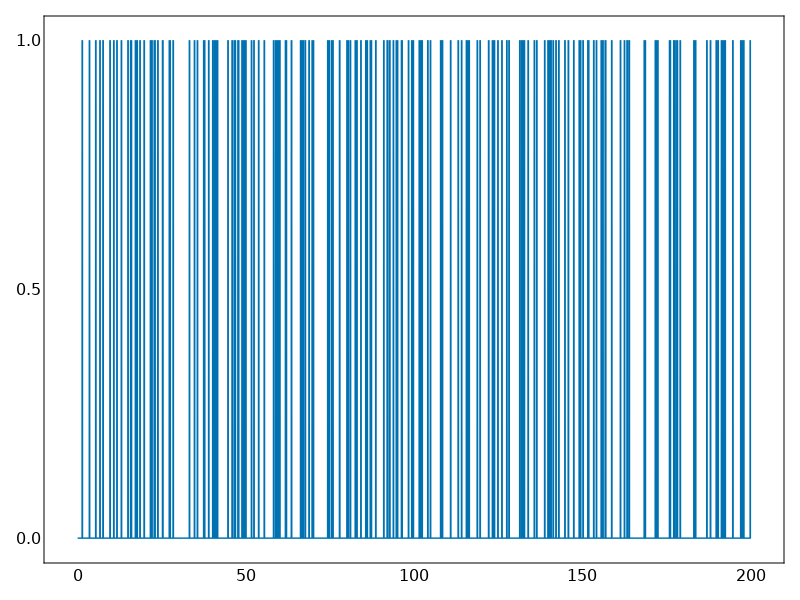

In [341]:
fig = Figure()
ax = Axis(fig[1,1])

lines!(ax, t, IEs[1])

hidedecorations!(ax, ticklabels=false)
fig

In [169]:
dt = 0.01
T = 200
t = 0:dt:T |> collect
t_mat = repeat(t', 10,1)
generate_i_ex(10, 0.1)

10×124 Matrix{Int64}:
 1486  1676  4378  6127  6262   8428  …  102135  102244  105494  106061
  308   641  1255  1578  3616   4179     111514  112672  115580  119884
 1038  1458  4340  5344  5594   7254     126754  127185  130457  130524
  456   503  1425  2033  2085   2190     110995  111398  112078  114738
  511  1413  4729  5022  5882   6209     113683  113744  117315  118989
  572   938   964  1018  1434   1831  …  112083  112726  112788  113174
  678  2879  7717  8229  9688  10469     121016  121242  121250  122653
  306   708  3264  4160  4198   4707     129881  130315  135160  135733
  321  1277  1465  1582  1999   2022     111565  115838  117169  117262
   71  1464  2314  2756  3074   3598     117516  121006  121020  121173

In [114]:
dt = 0.01; T = 200
rr = 100


intervals = -log.(1 .- rand(100,trunc(Int64,T / (1/rr) * 1.2)  )) ./ rr
intervals = cumsum(intervals, dims=2)


100×24000 Matrix{Float64}:
 0.00197755  0.0295908   0.0298591  …  238.117  238.123  238.123  238.128
 0.00911169  0.0132337   0.0244585     239.358  239.364  239.38   239.391
 0.0020313   0.0157472   0.0185109     238.574  238.598  238.598  238.604
 0.00270734  0.0191711   0.0611448     239.977  239.979  239.981  240.015
 0.00268879  0.0114135   0.0124894     238.448  238.469  238.473  238.479
 0.0164093   0.0300003   0.0408525  …  239.878  239.89   239.899  239.901
 0.0196707   0.0371894   0.0409031     240.354  240.361  240.368  240.371
 0.0365263   0.0367627   0.0816583     239.667  239.693  239.696  239.698
 0.0126255   0.0230815   0.0474979     239.729  239.755  239.771  239.801
 0.00440474  0.0316057   0.0355709     239.08   239.083  239.083  239.086
 ⋮                                  ⋱                             
 0.00722059  0.0131904   0.0216306     239.605  239.61   239.615  239.627
 0.00860974  0.0275309   0.030909      241.067  241.07   241.076  241.083
 0.00526399  0.009

In [115]:
minimum(maximum(intervals, dims=2))

237.87039491338896

In [112]:
x =[trunc.(Int64,floor.(intervals ./ 0.01)) for i in 1:10] .+ [i .* ones(Int64,100,10000)  for i in 1:10]

DimensionMismatch: DimensionMismatch: dimensions must match: a has dims (Base.OneTo(100), Base.OneTo(24000)), b has dims (Base.OneTo(100), Base.OneTo(10000)), mismatch at 2

In [92]:
vcat(x...)

1000×10000 Matrix{Int64}:
  4   4   5   11   30   34   38   48   76  …  100244  100262  100264  100266
  1   2  15   32   40   44   46   56   76     100471  100471  100485  100486
 27  30  37   48   50   62   62   73   73      98447   98462   98479   98482
 21  26  27   30   35   84   87  105  107     100166  100199  100246  100246
 15  32  39   87  105  107  129  148  167     100616  100621  100628  100629
  5  14  14   17   39   47   57   59   84  …   99957   99963   99966   99975
 14  36  47   49   55   64   82   96   99      99470   99495   99502   99510
 16  16  34   34   52   54   94  100  101      98936   98947   98974   99001
  6  10  34   67   72   77   79   99  103     100238  100242  100251  100254
 10  14  15   16   20   35   62   65  114      99068   99068   99075   99076
  ⋮                      ⋮                 ⋱                          
 56  58  90   99  104  109  118  125  135     100119  100121  100141  100152
 25  60  95  105  119  123  126  137  143      99744   9

In [93]:
t = 0:0.01:200 |> collect;

In [94]:
length(t)

20001

In [95]:
Ie = zeros(length(t))
Ie[vcat(vcat(x...)[[1:100:size(vcat(x...))[1]...],:])[vcat(vcat(x...)[[1:100:size(vcat(x...))[1]...],:]) .< length(t)]] .= 1

20019-element view(::Vector{Float64}, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13  …  19999, 19992, 19993, 19994, 19995, 19996, 19997, 19998, 19999, 20000]) with eltype Float64:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [96]:
using Makie, CairoMakie

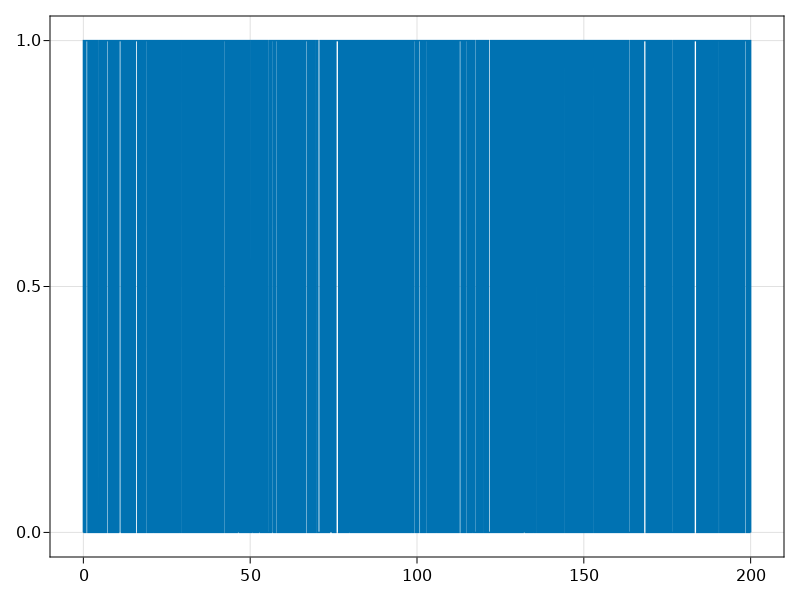

In [97]:
lines(t, Ie)

In [67]:
t[vcat(vcat(x...)[[1:100:size(vcat(x...))[1]...],:])[vcat(vcat(x...)[[1:100:size(vcat(x...))[1]...],:]) .< length(t)]]

2070-element Vector{Float64}:
   0.3
   0.31
   0.32
   0.33
   0.34
   0.35
   0.36
   0.37
   0.38
   0.39
   ⋮
 199.25
 199.26
 199.27
 199.28
 199.29
 199.3
 199.31
 199.32
 199.33

200

In [16]:
fill(intervals, 100)

100-element Vector{Matrix{Float64}}:
 [0.6625748305550737 1.9096824961638457 … 1039.4045442469092 1040.0952115935952; 4.652424548309808 7.265029741663024 … 978.7072967711047 979.5443142915555; … ; 0.5376363710976898 1.411032277087808 … 1017.6389741350561 1018.5406806925; 0.5351438781428194 2.2805269873697926 … 972.7586241519641 973.9848058841435]
 [0.6625748305550737 1.9096824961638457 … 1039.4045442469092 1040.0952115935952; 4.652424548309808 7.265029741663024 … 978.7072967711047 979.5443142915555; … ; 0.5376363710976898 1.411032277087808 … 1017.6389741350561 1018.5406806925; 0.5351438781428194 2.2805269873697926 … 972.7586241519641 973.9848058841435]
 [0.6625748305550737 1.9096824961638457 … 1039.4045442469092 1040.0952115935952; 4.652424548309808 7.265029741663024 … 978.7072967711047 979.5443142915555; … ; 0.5376363710976898 1.411032277087808 … 1017.6389741350561 1018.5406806925; 0.5351438781428194 2.2805269873697926 … 972.7586241519641 973.9848058841435]
 [0.6625748305550737 1.9096

In [110]:
function interval_time(r::Real, N::Int64; t_max=200, max_spike = 200, dt = 0.01)
    intervals = -log.(1 .- rand(N)) ./ r;
    outsipke_time = cumsum(intervals);
    return [0:dt:t_max...], [sum(outsipke_time .< t .<= (outsipke_time .+ 0.1)) == 1 ? max_spike : 0 for t in 0:dt:t_max];
end

interval_time (generic function with 2 methods)

In [124]:
_,outspikes = interval_time(0.08,1000)

([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  199.91, 199.92, 199.93, 199.94, 199.95, 199.96, 199.97, 199.98, 199.99, 200.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

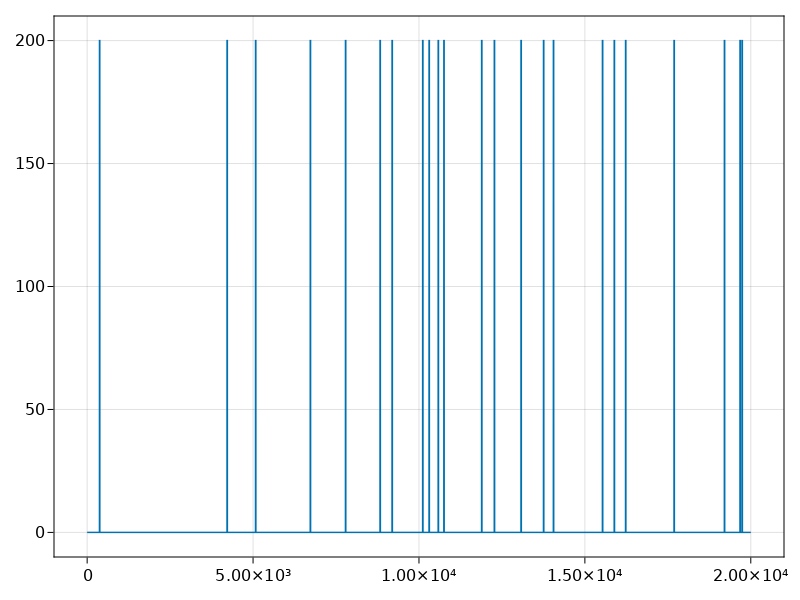

In [104]:
t = [0:dt:T...]
interval_t = interval_time(0.03,1000);

out_spikes = [sum(interval_t .< i .<= (interval_t .+ 0.1)) == 1 ? 200 : 0 for i in 0:dt:T]

20001-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

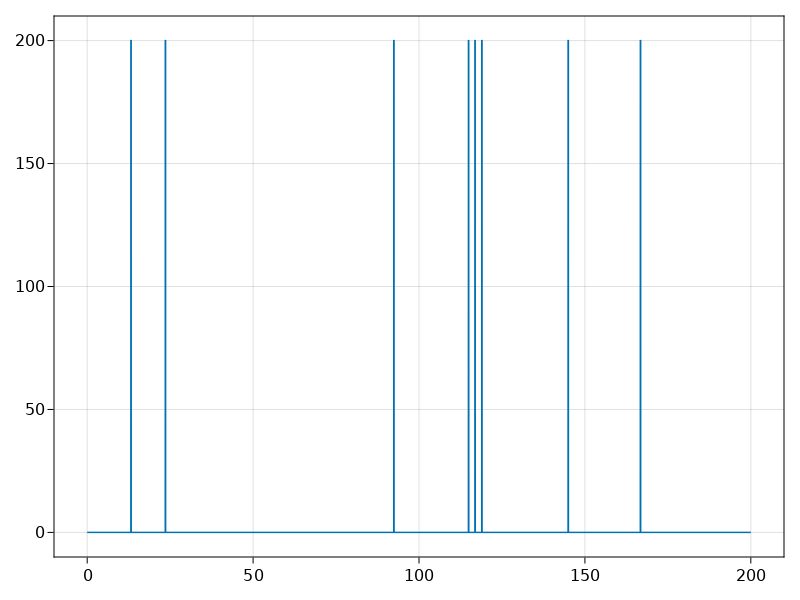

In [106]:
lines(t, out_spikes)

In [53]:
plot([0:0.01:200...], )

0.0006209958814906713

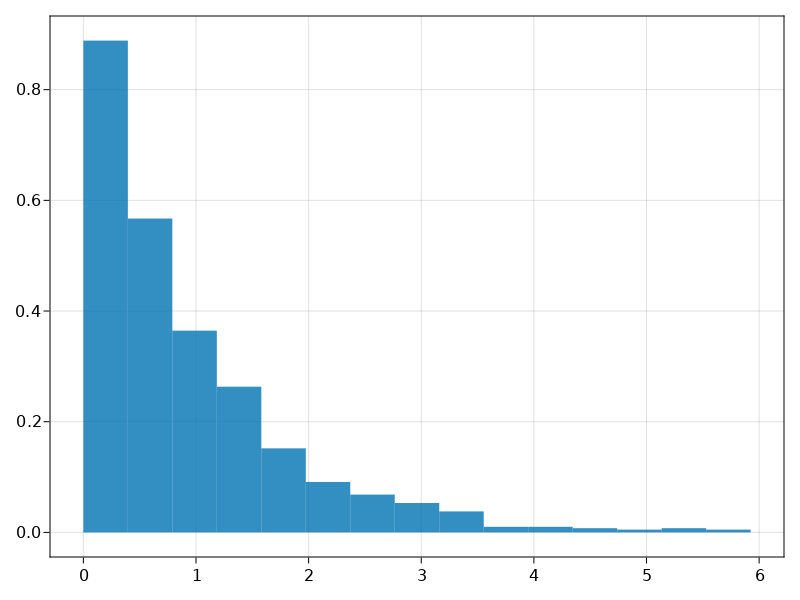

In [25]:
r = 1

f = Figure()
ax = Axis(f[1, 1])
hist!(ax, -log.(1 .- rand(1000)) ./ r, normalization=:pdf)
# lines!(ax, [0:0.01:10...], r .* exp.(-r .* [0:0.01:10...]), color=:red)
f

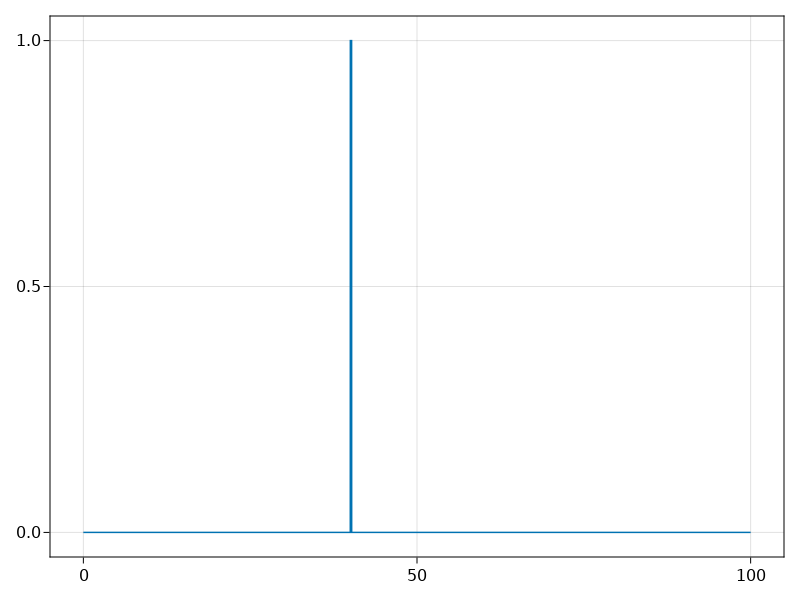

In [59]:
lines([0:0.01:100...], [40 < i <=40.2 ? 1 : 0 for i in 0:0.01:100])

In [2]:
using CairoMakie